# Actividad 0 - dataset exercises

1. Carga el dataset `'exercise'` usando el comando
        sns.load_dataset('exercise')
2. Elimina las columnas que no sean representativas. ¿ Tiene valores faltantes? . 
3. Establece el rango de valores de cada columna y su tipo.
4. Representa en un `factorplot` los valores de tiempo de ejercicio y el pulso para ver si hay una evolución.
   Haz también un `violinplot` de estos valores. ¿ Qué conclusiones se pueden extraer de las representaciones?
5. Representa un factorplot para las mismas variables pero dividiendo en dos columnas, una con dieta sin grasa y otra con  baja grasa. Representa de modo que las barras de confianza sean del 95%.
6. Crea un `FacetGrid` con los histogramas y las densidades para el pulso según los tipos de actividad por columnas y las dietas en filas. Compara la distribución de densidades en cada caso. ¿ Qué se observa?
7. Comprueba los resultados haciendo un agrupamiento y las medias con las correspondientes dispersiones.

In [23]:
import seaborn as sns
%matplotlib inline

dat=sns.load_dataset('exercise')
dat.head(10)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest


In [2]:
del dat['Unnamed: 0']
print(dat.shape)
dat.head()

(90, 5)


,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [3]:
dat.isnull().sum() # no hay valores faltantes

id       0
diet     0
pulse    0
time     0
kind     0
dtype: int64

In [4]:
dat.dtypes

id          int64
diet     category
pulse       int64
time     category
kind     category
dtype: object

In [5]:
dat.diet.unique()

[low fat, no fat]
Categories (2, object): [low fat, no fat]

In [6]:
dat.time.unique()

[1 min, 15 min, 30 min]
Categories (3, object): [1 min, 15 min, 30 min]

In [7]:
dat.kind.unique()

[rest, walking, running]
Categories (3, object): [rest, walking, running]

In [8]:
dat.pulse.describe()

count     90.000000
mean      99.700000
std       14.858471
min       80.000000
25%       90.250000
50%       96.000000
75%      103.000000
max      150.000000
Name: pulse, dtype: float64

In [9]:
dat.id.value_counts() #cada id se repite tres veces y va de 1 a 30

30    3
29    3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
1     3
Name: id, dtype: int64

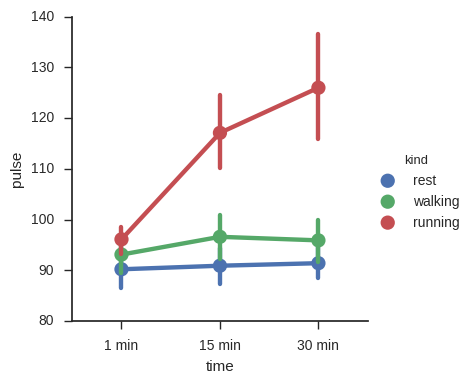

In [10]:
sns.set(style="ticks")
sns.factorplot(x="time", y="pulse", hue="kind", data=dat);

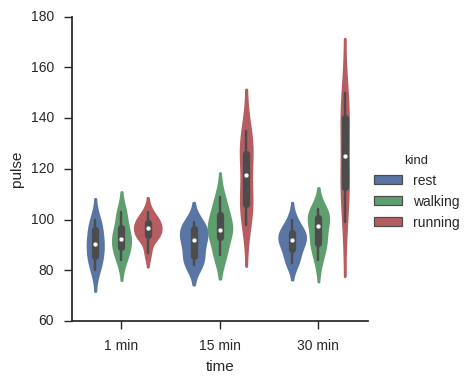

In [11]:
sns.factorplot(x="time", y="pulse", hue="kind",data=dat, kind="violin");

Se puede observar que cuando la dieta no tiene grasa las pulsaciones durante el ejercicio suben significativamnete más

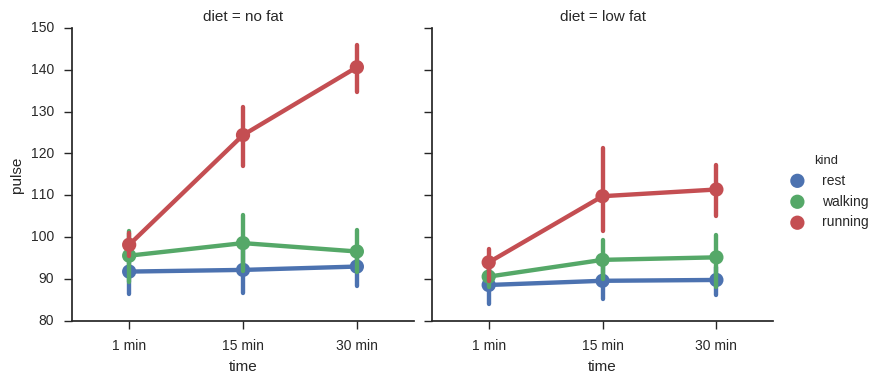

In [12]:
sns.factorplot(x="time", y="pulse", hue="kind",ci=95,col="diet", data=dat);

Se puede apreciar que los deportistas con dieta sin grasas tienen una media de pulsaciones superior a los que tienen poca grasa en la dieta.

/home/infinitemonkeys/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


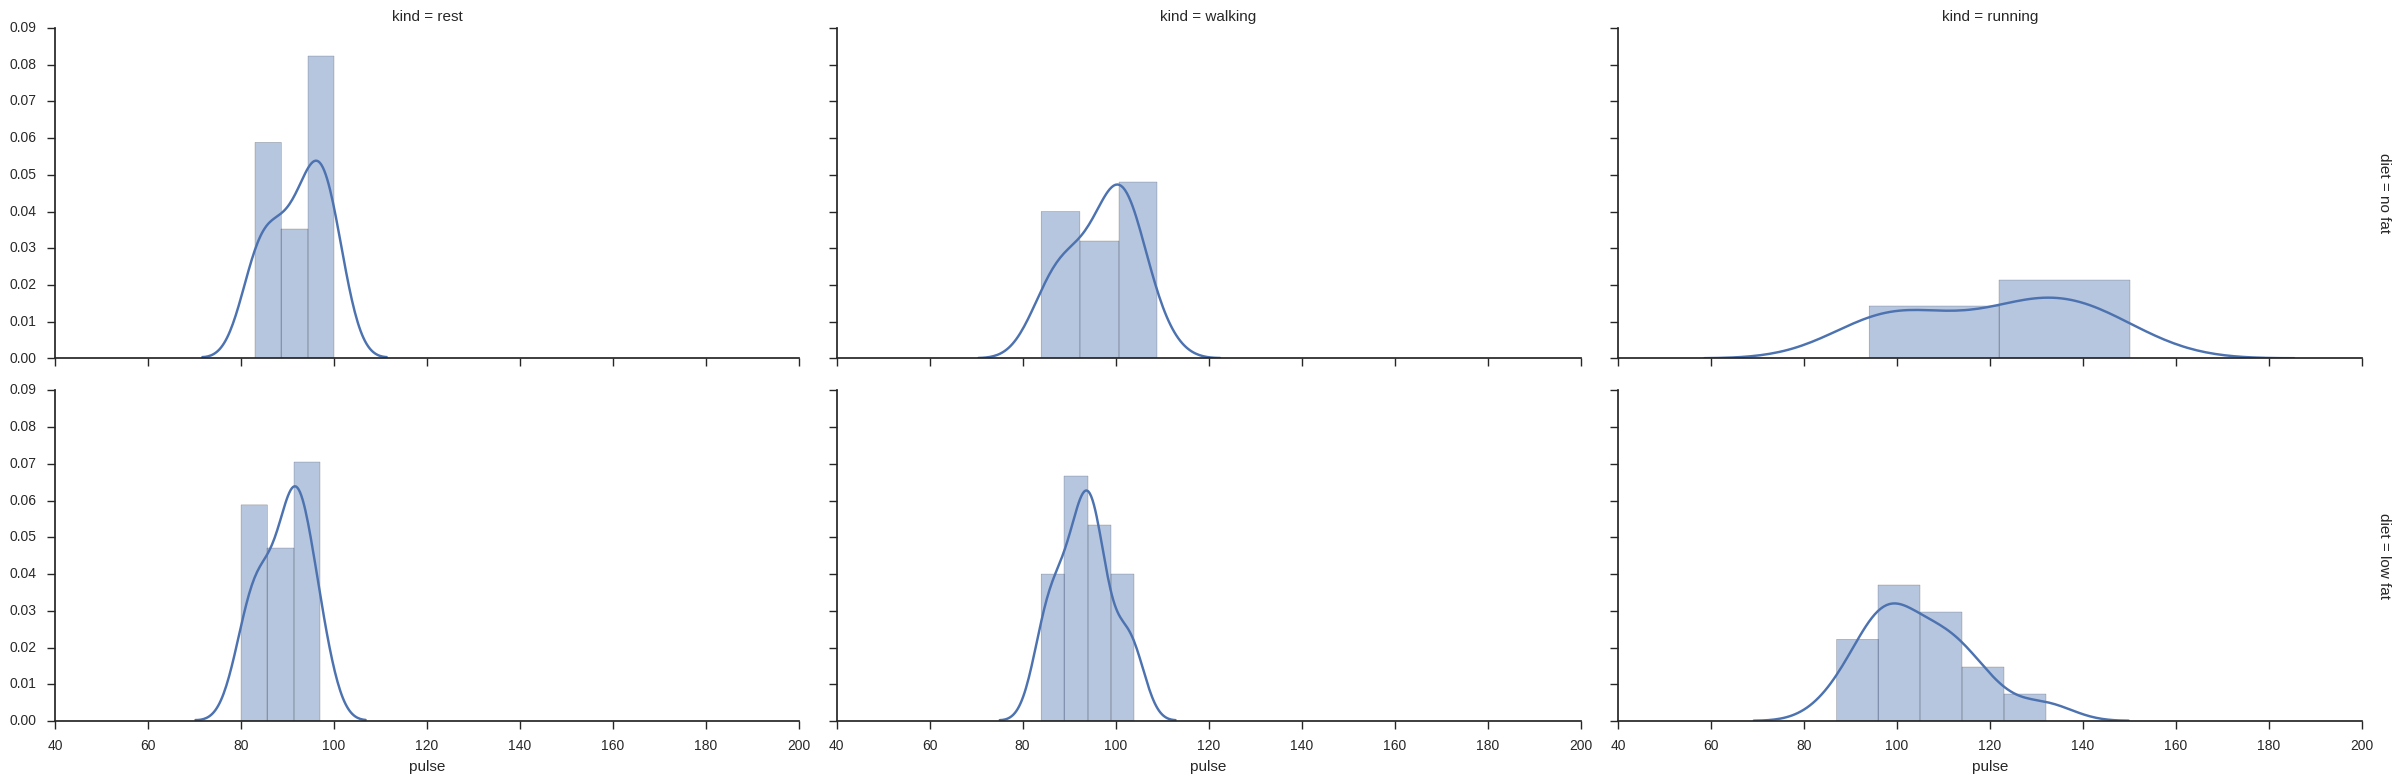

In [22]:
g=sns.FacetGrid(dat,row='diet',col='kind',margin_titles=True,size=4,aspect=2);
g.map(sns.distplot,'pulse');

In [26]:
dat.groupby(['diet','kind'])['pulse'].mean().unstack()

kind,rest,walking,running
diet,,,
no fat,92.333333,96.933333,121.066667
low fat,89.333333,93.466667,105.066667
